In [1]:
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *
import matplotlib as mpl

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Gridtools not found
Done


In [2]:
db = CaseDB()

toload = {
    "1" : "std5a-start_1pc",
    "6" : "std5b-ar1to6pc",
    "8" : "std9a-ar6to8pc",
    "further" : "std9d-stop_pi",
}

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(db.casepaths[toload[name]])


Loading std5a-start_1pc


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std5b-ar1to6pc


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std9a-ar6to8pc


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std9d-stop_pi


c:\Users\mikek\OneDrive\Project\pyenvs\fusion-a-310\lib\site-packages\dask\array\core.py:4830: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [4]:
plt.close("all")
%matplotlib inline

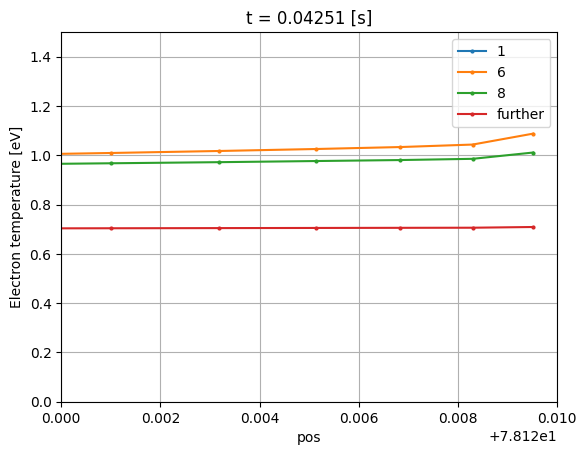

In [28]:
fig, ax = plt.subplots()
for case in toload:

    ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))
    ds["Te"].plot(ax = ax, marker = "o", ms = 2, label = case)
    
ax.set_xlim(78.12,78.130)
ax.set_ylim(0,1.5)
ax.grid()
ax.legend()
# ax.set_yscale("log")